In [1]:
from arquivos import central
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pandas as pd

In [2]:
robot = central.Central()

In [3]:
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\Data_H1_66k_icmarkets.csv', drop=True, drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [4]:
%%time
results = pd.DataFrame()
for i in [1, 2, 4, 7]:
    for j in range(1, 5):  
        robot.pct_data()
        robot.balance_signal4(j)
        robot.normal_data_to_array()
        tot, sell, buy, all_f = robot.back_no_tpsl()
        results[f'{i}_{j}'] = pd.Series(tot)

Wall time: 1min 46s


In [5]:
results

,1_1,1_2,1_3,1_4,2_1,2_2,2_3,2_4,4_1,4_2,4_3,4_4,7_1,7_2,7_3,7_4
0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
1,998.32,999.93,999.93,992.58,998.32,999.93,999.93,992.58,998.32,999.93,999.93,992.58,998.32,999.93,999.93,992.58
2,997.66,993.88,992.29,978.81,997.66,993.88,992.29,978.81,997.66,993.88,992.29,978.81,997.66,993.88,992.29,978.81
3,997.23,993.81,989.21,979.15,997.23,993.81,989.21,979.15,997.23,993.81,989.21,979.15,997.23,993.81,989.21,979.15
4,997.16,993.53,980.28,966.54,997.16,993.53,980.28,966.54,997.16,993.53,980.28,966.54,997.16,993.53,980.28,966.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247877,-12617.08,NaN,NaN,NaN,-12617.08,NaN,NaN,NaN,-12617.08,NaN,NaN,NaN,-12617.08,NaN,NaN,NaN
247878,-12617.20,NaN,NaN,NaN,-12617.20,NaN,NaN,NaN,-12617.20,NaN,NaN,NaN,-12617.20,NaN,NaN,NaN
247879,-12616.93,NaN,NaN,NaN,-12616.93,NaN,NaN,NaN,-12616.93,NaN,NaN,NaN,-12616.93,NaN,NaN,NaN
247880,-12617.63,NaN,NaN,NaN,-12617.63,NaN,NaN,NaN,-12617.63,NaN,NaN,NaN,-12617.63,NaN,NaN,NaN


<AxesSubplot:>

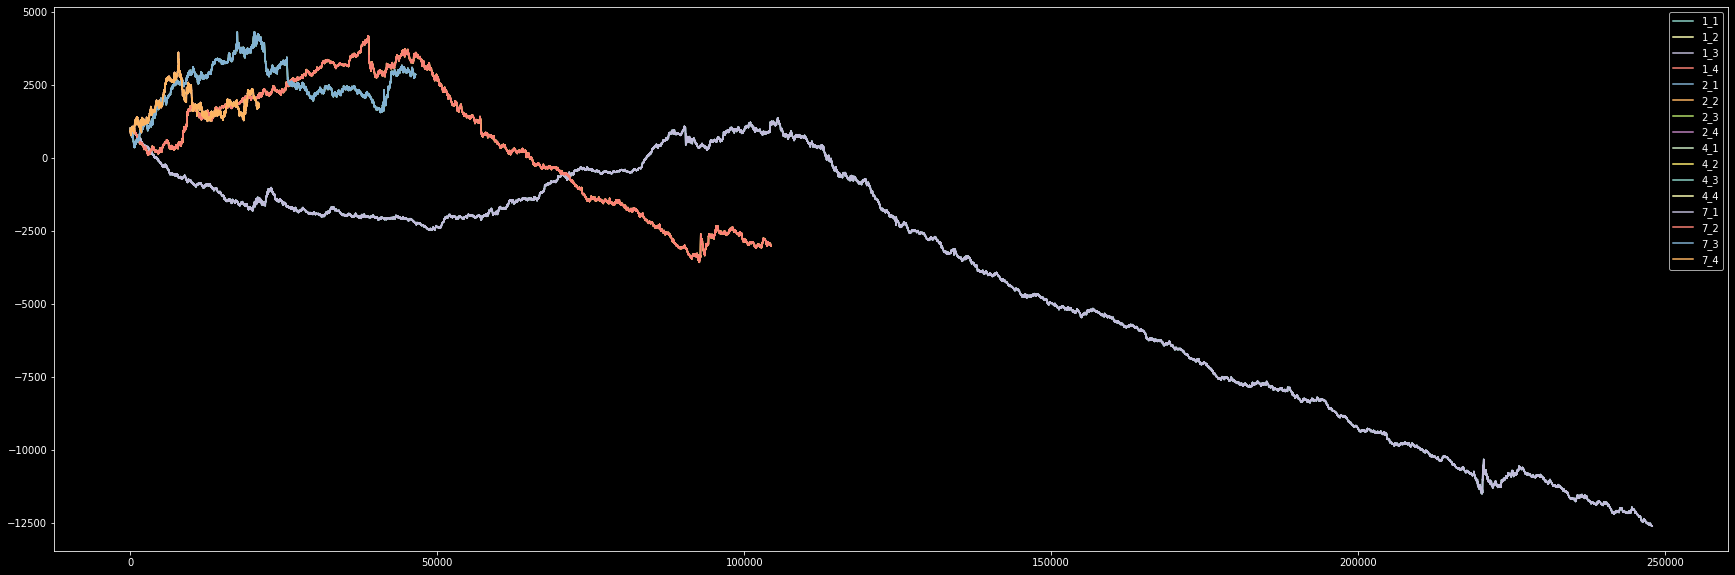

In [6]:
results.plot()

In [ ]:
eurusd = robot.get_normal_data()['EURUSD_Open']
eur = robot.get_normal_data()['eur']

In [ ]:
eurusd.diff()

In [ ]:
def count_all(series):
    high = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    low = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    geral = []
    count = 0

    for i, v in enumerate(series):

        if v < 0:
            if count < 0: count = 0
            high[count] += 1
            count += 1
        elif v > 0:
            if count > 0: count = 0
            low[abs(count)] += 1
            count -= 1
        else:
            count == 0

        geral.append(count)
        
    return geral, high, low

In [ ]:
g_eurusd, h_eurusd, l_eurusd = count_all(eurusd.diff())
g_eur, h_eur, l_eur = count_all(eur)

In [ ]:
plt.plot(g_eurusd[:500])
plt.plot(g_eur[:500])
plt.show()

In [ ]:
np.corrcoef(np.array(g_eurusd), np.array(g_eur))